### Importing the libraries

In [464]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn import over_sampling
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

### Reading the Dataset

In [465]:
df = pd.read_csv(r'C:\Users\Computer\Desktop\ML Projects\Corporate Credit Rating\corporate_rating.csv')
df

,Rating,Name,Symbol,Rating Agency Name,Date,Sector,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,...,effectiveTaxRate,freeCashFlowOperatingCashFlowRatio,freeCashFlowPerShare,cashPerShare,companyEquityMultiplier,ebitPerRevenue,enterpriseValueMultiple,operatingCashFlowPerShare,operatingCashFlowSalesRatio,payablesTurnover
0,A,Whirlpool Corporation,WHR,Egan-Jones Ratings Company,11/27/2015,Consumer Durables,0.945894,0.426395,0.099690,44.203245,...,0.202716,0.437551,6.810673,9.809403,4.008012,0.049351,7.057088,15.565438,0.058638,3.906655
1,BBB,Whirlpool Corporation,WHR,Egan-Jones Ratings Company,2/13/2014,Consumer Durables,1.033559,0.498234,0.203120,38.991156,...,0.074155,0.541997,8.625473,17.402270,3.156783,0.048857,6.460618,15.914250,0.067239,4.002846
2,BBB,Whirlpool Corporation,WHR,Fitch Ratings,3/6/2015,Consumer Durables,0.963703,0.451505,0.122099,50.841385,...,0.214529,0.513185,9.693487,13.103448,4.094575,0.044334,10.491970,18.888889,0.074426,3.483510
3,BBB,Whirlpool Corporation,WHR,Fitch Ratings,6/15/2012,Consumer Durables,1.019851,0.510402,0.176116,41.161738,...,1.816667,-0.147170,-1.015625,14.440104,3.630950,-0.012858,4.080741,6.901042,0.028394,4.581150
4,BBB,Whirlpool Corporation,WHR,Standard & Poor's Ratings Services,10/24/2016,Consumer Durables,0.957844,0.495432,0.141608,47.761126,...,0.166966,0.451372,7.135348,14.257556,4.012780,0.053770,8.293505,15.808147,0.058065,3.857790
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024,BBB,"NVR, Inc.",NVR,Moody's Investors Service,9/5/2012,Capital Goods,11.757767,7.115059,7.057420,1.079762,...,0.343500,0.953231,50.293155,230.194971,1.759461,0.086376,15.867701,52.760726,0.083018,15.758348
2025,BB,Kaiser Aluminum Corporation,KALU,Standard & Poor's Ratings Services,4/28/2016,Capital Goods,2.962788,1.294743,0.428234,30.602414,...,0.363636,0.602645,5.563630,5.958956,1.614282,-0.267117,-4.729967,9.232021,0.114089,14.542373
2026,B,Cresud S.A.C.I.F. y A.,CRESY,Fitch Ratings,11/30/2012,Finance,0.883875,0.842553,0.233830,147.599371,...,35.017544,0.926665,1.459801,1.056480,4.034952,0.265092,9.358311,1.575328,0.283634,2.300168
2027,B,Cresud S.A.C.I.F. y A.,CRESY,Fitch Ratings,6/15/2012,Finance,0.911713,0.748356,0.310640,131.644566,...,0.331525,0.692804,0.744377,1.470201,3.825856,0.130692,22.440102,1.074441,0.217783,1.997608


### Output Information

In [466]:
# 'AAA':'Lowest Risk', 
# 'AA':'Low Risk',
# 'A':'Low Risk',
# 'BBB':'Medium Risk', 
# 'BB':'High Risk',
# 'B':'High Risk',
# 'CCC':'Highest Risk', 
# 'CC':'Highest Risk',
# 'C':'Highest Risk',
# 'D':'In Default'


### Exploratory Data Analysis

### Structure of the Dataset

In [467]:
df_shape = df.shape
print("The credit rating dataset has", df_shape[0], "records, each with", df_shape[1],
    "attributes")

The credit rating dataset has 2029 records, each with 31 attributes


### Checking for the NUll Values

In [468]:
df.isna().sum()

Rating                                0
Name                                  0
Symbol                                0
Rating Agency Name                    0
Date                                  0
Sector                                0
currentRatio                          0
quickRatio                            0
cashRatio                             0
daysOfSalesOutstanding                0
netProfitMargin                       0
pretaxProfitMargin                    0
grossProfitMargin                     0
operatingProfitMargin                 0
returnOnAssets                        0
returnOnCapitalEmployed               0
returnOnEquity                        0
assetTurnover                         0
fixedAssetTurnover                    0
debtEquityRatio                       0
debtRatio                             0
effectiveTaxRate                      0
freeCashFlowOperatingCashFlowRatio    0
freeCashFlowPerShare                  0
cashPerShare                          0


### Luckily we don't have any null vales in our Dataset

### Checking for imbalanceness in the Dataset

In [469]:
df.Rating.value_counts()

BBB    671
BB     490
A      398
B      302
AA      89
CCC     64
AAA      7
CC       5
C        2
D        1
Name: Rating, dtype: int64

### From the above ouput we Come to know that our dataset is imblanced. To treat this imbalance dataset we are doing Oversampling rather than down sampling as it will lead to loss of data

In [470]:
df=df[[ 'Name', 'Symbol', 'Rating Agency Name', 'Date', 'Sector',
       'currentRatio', 'quickRatio', 'cashRatio', 'daysOfSalesOutstanding',
       'netProfitMargin', 'pretaxProfitMargin', 'grossProfitMargin',
       'operatingProfitMargin', 'returnOnAssets', 'returnOnCapitalEmployed',
       'returnOnEquity', 'assetTurnover', 'fixedAssetTurnover',
       'debtEquityRatio', 'debtRatio', 'effectiveTaxRate',
       'freeCashFlowOperatingCashFlowRatio', 'freeCashFlowPerShare',
       'cashPerShare', 'companyEquityMultiplier', 'ebitPerRevenue',
       'enterpriseValueMultiple', 'operatingCashFlowPerShare',
       'operatingCashFlowSalesRatio', 'payablesTurnover','Rating']]

In [471]:
df

,Name,Symbol,Rating Agency Name,Date,Sector,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,netProfitMargin,...,freeCashFlowOperatingCashFlowRatio,freeCashFlowPerShare,cashPerShare,companyEquityMultiplier,ebitPerRevenue,enterpriseValueMultiple,operatingCashFlowPerShare,operatingCashFlowSalesRatio,payablesTurnover,Rating
0,Whirlpool Corporation,WHR,Egan-Jones Ratings Company,11/27/2015,Consumer Durables,0.945894,0.426395,0.099690,44.203245,0.037480,...,0.437551,6.810673,9.809403,4.008012,0.049351,7.057088,15.565438,0.058638,3.906655,A
1,Whirlpool Corporation,WHR,Egan-Jones Ratings Company,2/13/2014,Consumer Durables,1.033559,0.498234,0.203120,38.991156,0.044062,...,0.541997,8.625473,17.402270,3.156783,0.048857,6.460618,15.914250,0.067239,4.002846,BBB
2,Whirlpool Corporation,WHR,Fitch Ratings,3/6/2015,Consumer Durables,0.963703,0.451505,0.122099,50.841385,0.032709,...,0.513185,9.693487,13.103448,4.094575,0.044334,10.491970,18.888889,0.074426,3.483510,BBB
3,Whirlpool Corporation,WHR,Fitch Ratings,6/15/2012,Consumer Durables,1.019851,0.510402,0.176116,41.161738,0.020894,...,-0.147170,-1.015625,14.440104,3.630950,-0.012858,4.080741,6.901042,0.028394,4.581150,BBB
4,Whirlpool Corporation,WHR,Standard & Poor's Ratings Services,10/24/2016,Consumer Durables,0.957844,0.495432,0.141608,47.761126,0.042861,...,0.451372,7.135348,14.257556,4.012780,0.053770,8.293505,15.808147,0.058065,3.857790,BBB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024,"NVR, Inc.",NVR,Moody's Investors Service,9/5/2012,Capital Goods,11.757767,7.115059,7.057420,1.079762,0.056706,...,0.953231,50.293155,230.194971,1.759461,0.086376,15.867701,52.760726,0.083018,15.758348,BBB
2025,Kaiser Aluminum Corporation,KALU,Standard & Poor's Ratings Services,4/28/2016,Capital Goods,2.962788,1.294743,0.428234,30.602414,-0.169983,...,0.602645,5.563630,5.958956,1.614282,-0.267117,-4.729967,9.232021,0.114089,14.542373,BB
2026,Cresud S.A.C.I.F. y A.,CRESY,Fitch Ratings,11/30/2012,Finance,0.883875,0.842553,0.233830,147.599371,-0.007458,...,0.926665,1.459801,1.056480,4.034952,0.265092,9.358311,1.575328,0.283634,2.300168,B
2027,Cresud S.A.C.I.F. y A.,CRESY,Fitch Ratings,6/15/2012,Finance,0.911713,0.748356,0.310640,131.644566,0.087365,...,0.692804,0.744377,1.470201,3.825856,0.130692,22.440102,1.074441,0.217783,1.997608,B


In [472]:
X=df.iloc[:,:-1]
Y=df.iloc[:,-1]

In [473]:
ros=RandomOverSampler(random_state=0)
X_resampled, y_resampled=ros.fit_resample(X,Y)
print(sorted(Counter(y_resampled).items()), y_resampled.shape)

[('A', 671), ('AA', 671), ('AAA', 671), ('B', 671), ('BB', 671), ('BBB', 671), ('C', 671), ('CC', 671), ('CCC', 671), ('D', 671)] (6710,)


In [474]:
df=X_resampled.join(y_resampled)
df

,Name,Symbol,Rating Agency Name,Date,Sector,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,netProfitMargin,...,freeCashFlowOperatingCashFlowRatio,freeCashFlowPerShare,cashPerShare,companyEquityMultiplier,ebitPerRevenue,enterpriseValueMultiple,operatingCashFlowPerShare,operatingCashFlowSalesRatio,payablesTurnover,Rating
0,Whirlpool Corporation,WHR,Egan-Jones Ratings Company,11/27/2015,Consumer Durables,0.945894,0.426395,0.099690,44.203245,0.037480,...,0.437551,6.810673,9.809403,4.008012,0.049351,7.057088,15.565438,0.058638,3.906655,A
1,Whirlpool Corporation,WHR,Egan-Jones Ratings Company,2/13/2014,Consumer Durables,1.033559,0.498234,0.203120,38.991156,0.044062,...,0.541997,8.625473,17.402270,3.156783,0.048857,6.460618,15.914250,0.067239,4.002846,BBB
2,Whirlpool Corporation,WHR,Fitch Ratings,3/6/2015,Consumer Durables,0.963703,0.451505,0.122099,50.841385,0.032709,...,0.513185,9.693487,13.103448,4.094575,0.044334,10.491970,18.888889,0.074426,3.483510,BBB
3,Whirlpool Corporation,WHR,Fitch Ratings,6/15/2012,Consumer Durables,1.019851,0.510402,0.176116,41.161738,0.020894,...,-0.147170,-1.015625,14.440104,3.630950,-0.012858,4.080741,6.901042,0.028394,4.581150,BBB
4,Whirlpool Corporation,WHR,Standard & Poor's Ratings Services,10/24/2016,Consumer Durables,0.957844,0.495432,0.141608,47.761126,0.042861,...,0.451372,7.135348,14.257556,4.012780,0.053770,8.293505,15.808147,0.058065,3.857790,BBB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6705,California Resources Corporation,CRC,Standard & Poor's Ratings Services,8/24/2016,Energy,0.585399,0.389807,0.016529,54.738203,0.180349,...,0.423077,1.361386,1.262376,-11.407540,0.129929,20.818231,3.217822,0.084034,3.652968,D
6706,California Resources Corporation,CRC,Standard & Poor's Ratings Services,8/24/2016,Energy,0.585399,0.389807,0.016529,54.738203,0.180349,...,0.423077,1.361386,1.262376,-11.407540,0.129929,20.818231,3.217822,0.084034,3.652968,D
6707,California Resources Corporation,CRC,Standard & Poor's Ratings Services,8/24/2016,Energy,0.585399,0.389807,0.016529,54.738203,0.180349,...,0.423077,1.361386,1.262376,-11.407540,0.129929,20.818231,3.217822,0.084034,3.652968,D
6708,California Resources Corporation,CRC,Standard & Poor's Ratings Services,8/24/2016,Energy,0.585399,0.389807,0.016529,54.738203,0.180349,...,0.423077,1.361386,1.262376,-11.407540,0.129929,20.818231,3.217822,0.084034,3.652968,D


In [475]:
df

,Name,Symbol,Rating Agency Name,Date,Sector,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,netProfitMargin,...,freeCashFlowOperatingCashFlowRatio,freeCashFlowPerShare,cashPerShare,companyEquityMultiplier,ebitPerRevenue,enterpriseValueMultiple,operatingCashFlowPerShare,operatingCashFlowSalesRatio,payablesTurnover,Rating
0,Whirlpool Corporation,WHR,Egan-Jones Ratings Company,11/27/2015,Consumer Durables,0.945894,0.426395,0.099690,44.203245,0.037480,...,0.437551,6.810673,9.809403,4.008012,0.049351,7.057088,15.565438,0.058638,3.906655,A
1,Whirlpool Corporation,WHR,Egan-Jones Ratings Company,2/13/2014,Consumer Durables,1.033559,0.498234,0.203120,38.991156,0.044062,...,0.541997,8.625473,17.402270,3.156783,0.048857,6.460618,15.914250,0.067239,4.002846,BBB
2,Whirlpool Corporation,WHR,Fitch Ratings,3/6/2015,Consumer Durables,0.963703,0.451505,0.122099,50.841385,0.032709,...,0.513185,9.693487,13.103448,4.094575,0.044334,10.491970,18.888889,0.074426,3.483510,BBB
3,Whirlpool Corporation,WHR,Fitch Ratings,6/15/2012,Consumer Durables,1.019851,0.510402,0.176116,41.161738,0.020894,...,-0.147170,-1.015625,14.440104,3.630950,-0.012858,4.080741,6.901042,0.028394,4.581150,BBB
4,Whirlpool Corporation,WHR,Standard & Poor's Ratings Services,10/24/2016,Consumer Durables,0.957844,0.495432,0.141608,47.761126,0.042861,...,0.451372,7.135348,14.257556,4.012780,0.053770,8.293505,15.808147,0.058065,3.857790,BBB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6705,California Resources Corporation,CRC,Standard & Poor's Ratings Services,8/24/2016,Energy,0.585399,0.389807,0.016529,54.738203,0.180349,...,0.423077,1.361386,1.262376,-11.407540,0.129929,20.818231,3.217822,0.084034,3.652968,D
6706,California Resources Corporation,CRC,Standard & Poor's Ratings Services,8/24/2016,Energy,0.585399,0.389807,0.016529,54.738203,0.180349,...,0.423077,1.361386,1.262376,-11.407540,0.129929,20.818231,3.217822,0.084034,3.652968,D
6707,California Resources Corporation,CRC,Standard & Poor's Ratings Services,8/24/2016,Energy,0.585399,0.389807,0.016529,54.738203,0.180349,...,0.423077,1.361386,1.262376,-11.407540,0.129929,20.818231,3.217822,0.084034,3.652968,D
6708,California Resources Corporation,CRC,Standard & Poor's Ratings Services,8/24/2016,Energy,0.585399,0.389807,0.016529,54.738203,0.180349,...,0.423077,1.361386,1.262376,-11.407540,0.129929,20.818231,3.217822,0.084034,3.652968,D


In [476]:
print(df.shape)
print(df.Rating.value_counts())

(6710, 31)
A      671
BBB    671
AA     671
BB     671
B      671
CCC    671
D      671
CC     671
AAA    671
C      671
Name: Rating, dtype: int64


### We Have balanced the above dataset by oversamplig which has resulted in increase in number of rows in our dataset

### Performing Exploratory Data Analysis

### Checking For Outlier in dataset

In [477]:
df.describe(percentiles=[0.05,0.5,0.997])

,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,netProfitMargin,pretaxProfitMargin,grossProfitMargin,operatingProfitMargin,returnOnAssets,returnOnCapitalEmployed,...,effectiveTaxRate,freeCashFlowOperatingCashFlowRatio,freeCashFlowPerShare,cashPerShare,companyEquityMultiplier,ebitPerRevenue,enterpriseValueMultiple,operatingCashFlowPerShare,operatingCashFlowSalesRatio,payablesTurnover
count,6710.000000,6710.000000,6710.000000,6710.000000,6710.000000,6710.000000,6710.000000,6710.000000,6710.000000,6710.000000,...,6710.000000,6710.000000,6.710000e+03,6.710000e+03,6710.000000,6710.000000,6710.000000,6.710000e+03,6710.000000,6710.000000
mean,5.762263,2.089641,0.781243,171.995372,0.129504,0.187403,0.628517,0.185166,-808.079302,-1746.861083,...,0.064728,0.217235,2.351185e+03,1.866914e+03,3.401088,0.191158,35.804210,2.986910e+03,0.652926,81.035227
std,77.155735,22.296241,5.798335,3020.193565,3.698344,5.398954,0.421316,6.670177,5634.368352,12191.636558,...,6.377140,3.831417,9.014515e+04,7.516265e+04,115.361709,5.398481,403.428879,1.135359e+05,11.717682,1203.602049
min,-0.932005,-1.893266,-0.192736,-811.845623,-101.845815,-124.343612,-14.800817,-124.343612,-40213.178290,-87162.162160,...,-100.611015,-120.916010,-4.912742e+03,-1.915035e+01,-2555.419643,-124.343612,-3749.921337,-1.195049e+04,-4.461837,-76.662850
5%,0.585399,0.296829,0.016529,0.000000,-0.372175,-0.385180,0.098703,-0.454294,-0.350878,-0.612179,...,-1.177994,-1.916667,-5.334229e+00,2.013044e-01,-11.407540,-0.378142,-4.575735,-5.212766e+00,-0.074596,0.000000
50%,1.400056,0.857120,0.297482,40.851994,0.078772,0.091846,0.689818,0.078662,0.043909,0.056117,...,0.229419,0.550141,1.454166e+00,4.308068e+00,2.200504,0.094316,9.632668,3.217822e+00,0.095021,3.841894
99.7%,155.940159,61.433789,25.010362,6307.472172,2.193554,2.866941,1.743957,3.148057,0.485445,0.589263,...,6.839636,7.846049,6.071509e+03,6.919305e+03,155.343031,2.866941,3137.855178,7.900785e+03,43.528040,19100.995500
max,1725.505005,1139.541703,125.917417,115961.637400,198.517873,309.694856,2.702533,410.182214,0.487826,2.439504,...,429.926282,34.594086,5.753380e+06,4.786803e+06,2562.871795,309.694856,11153.607090,6.439270e+06,688.526591,20314.880400


In [478]:
df.columns

Index(['Name', 'Symbol', 'Rating Agency Name', 'Date', 'Sector',
       'currentRatio', 'quickRatio', 'cashRatio', 'daysOfSalesOutstanding',
       'netProfitMargin', 'pretaxProfitMargin', 'grossProfitMargin',
       'operatingProfitMargin', 'returnOnAssets', 'returnOnCapitalEmployed',
       'returnOnEquity', 'assetTurnover', 'fixedAssetTurnover',
       'debtEquityRatio', 'debtRatio', 'effectiveTaxRate',
       'freeCashFlowOperatingCashFlowRatio', 'freeCashFlowPerShare',
       'cashPerShare', 'companyEquityMultiplier', 'ebitPerRevenue',
       'enterpriseValueMultiple', 'operatingCashFlowPerShare',
       'operatingCashFlowSalesRatio', 'payablesTurnover', 'Rating'],
      dtype='object')

In [479]:
# We will be checking for Outliers in the Dataset in all numerical columns and if any of the columns has outliers it will be trated by Winsoriing Technique
df.iloc[:,5:-1]



,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,netProfitMargin,pretaxProfitMargin,grossProfitMargin,operatingProfitMargin,returnOnAssets,returnOnCapitalEmployed,...,effectiveTaxRate,freeCashFlowOperatingCashFlowRatio,freeCashFlowPerShare,cashPerShare,companyEquityMultiplier,ebitPerRevenue,enterpriseValueMultiple,operatingCashFlowPerShare,operatingCashFlowSalesRatio,payablesTurnover
0,0.945894,0.426395,0.099690,44.203245,0.037480,0.049351,0.176631,0.061510,0.041189,0.091514,...,0.202716,0.437551,6.810673,9.809403,4.008012,0.049351,7.057088,15.565438,0.058638,3.906655
1,1.033559,0.498234,0.203120,38.991156,0.044062,0.048857,0.175715,0.066546,0.053204,0.104800,...,0.074155,0.541997,8.625473,17.402270,3.156783,0.048857,6.460618,15.914250,0.067239,4.002846
2,0.963703,0.451505,0.122099,50.841385,0.032709,0.044334,0.170843,0.059783,0.032497,0.075955,...,0.214529,0.513185,9.693487,13.103448,4.094575,0.044334,10.491970,18.888889,0.074426,3.483510
3,1.019851,0.510402,0.176116,41.161738,0.020894,-0.012858,0.138059,0.042430,0.025690,-0.027015,...,1.816667,-0.147170,-1.015625,14.440104,3.630950,-0.012858,4.080741,6.901042,0.028394,4.581150
4,0.957844,0.495432,0.141608,47.761126,0.042861,0.053770,0.177720,0.065354,0.046363,0.096945,...,0.166966,0.451372,7.135348,14.257556,4.012780,0.053770,8.293505,15.808147,0.058065,3.857790
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6705,0.585399,0.389807,0.016529,54.738203,0.180349,0.129929,1.000000,-0.197802,0.043909,0.035714,...,-0.388060,0.423077,1.361386,1.262376,-11.407540,0.129929,20.818231,3.217822,0.084034,3.652968
6706,0.585399,0.389807,0.016529,54.738203,0.180349,0.129929,1.000000,-0.197802,0.043909,0.035714,...,-0.388060,0.423077,1.361386,1.262376,-11.407540,0.129929,20.818231,3.217822,0.084034,3.652968
6707,0.585399,0.389807,0.016529,54.738203,0.180349,0.129929,1.000000,-0.197802,0.043909,0.035714,...,-0.388060,0.423077,1.361386,1.262376,-11.407540,0.129929,20.818231,3.217822,0.084034,3.652968
6708,0.585399,0.389807,0.016529,54.738203,0.180349,0.129929,1.000000,-0.197802,0.043909,0.035714,...,-0.388060,0.423077,1.361386,1.262376,-11.407540,0.129929,20.818231,3.217822,0.084034,3.652968


In [480]:
data={}
def outlier_treatment(i):
    values=[]
    min_value=df[i].describe(percentiles=[0.05,0.995])[4]
    max_value=df[i].describe(percentiles=[0.05,0.995])[6]
    for j in df[i]:
        if j < min_value :
            values.append(min_value)
        elif j> max_value :
            values.append(max_value)
        else :
            values.append(j)
    data[i]=values

In [481]:
dff = df.iloc[:,5:-1]
dff
for i in dff.columns:
    outlier_treatment(i)
new=pd.DataFrame(data)

In [482]:
new.describe(percentiles=[0.05,0.5,0.997])

,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,netProfitMargin,pretaxProfitMargin,grossProfitMargin,operatingProfitMargin,returnOnAssets,returnOnCapitalEmployed,...,effectiveTaxRate,freeCashFlowOperatingCashFlowRatio,freeCashFlowPerShare,cashPerShare,companyEquityMultiplier,ebitPerRevenue,enterpriseValueMultiple,operatingCashFlowPerShare,operatingCashFlowSalesRatio,payablesTurnover
count,6710.000000,6710.000000,6710.000000,6710.000000,6710.000000,6710.000000,6710.000000,6710.000000,6710.000000,6710.000000,...,6710.000000,6710.000000,6710.000000,6710.000000,6710.000000,6710.000000,6710.000000,6710.000000,6710.000000,6710.000000
mean,2.491593,1.360915,0.519642,47.216985,0.105408,0.123075,0.634305,0.053815,0.021022,0.051091,...,0.201564,0.386223,155.336169,72.473689,1.929127,0.126370,24.176133,78.097149,0.163118,9.728725
std,9.704541,2.348843,1.186330,82.661113,0.355421,0.325680,0.350635,0.209322,0.177833,0.236424,...,0.700832,1.112212,927.577822,484.910611,9.442762,0.324824,146.409697,636.816821,0.227262,45.817157
min,0.585399,0.296829,0.016529,0.000000,-0.372175,-0.385180,0.098703,-0.454294,-0.350878,-0.612179,...,-1.177994,-1.916667,-5.334229,0.201304,-11.407540,-0.378142,-4.575735,-5.212766,-0.074596,0.000000
5%,0.585399,0.297533,0.016529,0.000000,-0.372175,-0.381841,0.098703,-0.454294,-0.350878,-0.612179,...,-1.177994,-1.916667,-5.334229,0.201642,-11.407540,-0.377970,-4.575735,-5.212766,-0.074596,0.000000
50%,1.400056,0.857120,0.297482,40.851994,0.078772,0.091846,0.689818,0.078662,0.043909,0.056117,...,0.229419,0.550141,1.454166,4.308068,2.200504,0.094316,9.632668,3.217822,0.095021,3.841894
99.7%,124.256256,26.118047,12.674148,1045.497929,1.942862,1.290073,1.736794,0.621470,0.485445,0.589263,...,4.603440,7.638940,6071.508882,5160.957965,89.669603,1.290073,1930.046224,6932.861546,2.101034,614.032634
max,124.256256,26.118047,12.674148,1045.497929,1.942862,1.290073,1.736794,0.621470,0.485445,0.589263,...,4.603440,7.638940,6071.508882,5160.957965,89.669603,1.290073,1930.046224,6932.861546,2.101034,614.032634


In [483]:
new2=df[['Name', 'Symbol', 'Rating Agency Name', 'Date', 'Sector','Rating']]
df=new2.join(new)
df=df[['Name', 'Symbol', 'Rating Agency Name', 'Date', 'Sector',
       'currentRatio', 'quickRatio', 'cashRatio', 'daysOfSalesOutstanding',
       'netProfitMargin', 'pretaxProfitMargin', 'grossProfitMargin',
       'operatingProfitMargin', 'returnOnAssets', 'returnOnCapitalEmployed',
       'returnOnEquity', 'assetTurnover', 'fixedAssetTurnover',
       'debtEquityRatio', 'debtRatio', 'effectiveTaxRate',
       'freeCashFlowOperatingCashFlowRatio', 'freeCashFlowPerShare',
       'cashPerShare', 'companyEquityMultiplier', 'ebitPerRevenue',
       'enterpriseValueMultiple', 'operatingCashFlowPerShare',
       'operatingCashFlowSalesRatio', 'payablesTurnover','Rating']]

In [484]:
df.describe(percentiles=[0.05,0.5,0.997])

,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,netProfitMargin,pretaxProfitMargin,grossProfitMargin,operatingProfitMargin,returnOnAssets,returnOnCapitalEmployed,...,effectiveTaxRate,freeCashFlowOperatingCashFlowRatio,freeCashFlowPerShare,cashPerShare,companyEquityMultiplier,ebitPerRevenue,enterpriseValueMultiple,operatingCashFlowPerShare,operatingCashFlowSalesRatio,payablesTurnover
count,6710.000000,6710.000000,6710.000000,6710.000000,6710.000000,6710.000000,6710.000000,6710.000000,6710.000000,6710.000000,...,6710.000000,6710.000000,6710.000000,6710.000000,6710.000000,6710.000000,6710.000000,6710.000000,6710.000000,6710.000000
mean,2.491593,1.360915,0.519642,47.216985,0.105408,0.123075,0.634305,0.053815,0.021022,0.051091,...,0.201564,0.386223,155.336169,72.473689,1.929127,0.126370,24.176133,78.097149,0.163118,9.728725
std,9.704541,2.348843,1.186330,82.661113,0.355421,0.325680,0.350635,0.209322,0.177833,0.236424,...,0.700832,1.112212,927.577822,484.910611,9.442762,0.324824,146.409697,636.816821,0.227262,45.817157
min,0.585399,0.296829,0.016529,0.000000,-0.372175,-0.385180,0.098703,-0.454294,-0.350878,-0.612179,...,-1.177994,-1.916667,-5.334229,0.201304,-11.407540,-0.378142,-4.575735,-5.212766,-0.074596,0.000000
5%,0.585399,0.297533,0.016529,0.000000,-0.372175,-0.381841,0.098703,-0.454294,-0.350878,-0.612179,...,-1.177994,-1.916667,-5.334229,0.201642,-11.407540,-0.377970,-4.575735,-5.212766,-0.074596,0.000000
50%,1.400056,0.857120,0.297482,40.851994,0.078772,0.091846,0.689818,0.078662,0.043909,0.056117,...,0.229419,0.550141,1.454166,4.308068,2.200504,0.094316,9.632668,3.217822,0.095021,3.841894
99.7%,124.256256,26.118047,12.674148,1045.497929,1.942862,1.290073,1.736794,0.621470,0.485445,0.589263,...,4.603440,7.638940,6071.508882,5160.957965,89.669603,1.290073,1930.046224,6932.861546,2.101034,614.032634
max,124.256256,26.118047,12.674148,1045.497929,1.942862,1.290073,1.736794,0.621470,0.485445,0.589263,...,4.603440,7.638940,6071.508882,5160.957965,89.669603,1.290073,1930.046224,6932.861546,2.101034,614.032634


In [485]:
df

,Name,Symbol,Rating Agency Name,Date,Sector,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,netProfitMargin,...,freeCashFlowOperatingCashFlowRatio,freeCashFlowPerShare,cashPerShare,companyEquityMultiplier,ebitPerRevenue,enterpriseValueMultiple,operatingCashFlowPerShare,operatingCashFlowSalesRatio,payablesTurnover,Rating
0,Whirlpool Corporation,WHR,Egan-Jones Ratings Company,11/27/2015,Consumer Durables,0.945894,0.426395,0.099690,44.203245,0.037480,...,0.437551,6.810673,9.809403,4.008012,0.049351,7.057088,15.565438,0.058638,3.906655,A
1,Whirlpool Corporation,WHR,Egan-Jones Ratings Company,2/13/2014,Consumer Durables,1.033559,0.498234,0.203120,38.991156,0.044062,...,0.541997,8.625473,17.402270,3.156783,0.048857,6.460618,15.914250,0.067239,4.002846,BBB
2,Whirlpool Corporation,WHR,Fitch Ratings,3/6/2015,Consumer Durables,0.963703,0.451505,0.122099,50.841385,0.032709,...,0.513185,9.693487,13.103448,4.094575,0.044334,10.491970,18.888889,0.074426,3.483510,BBB
3,Whirlpool Corporation,WHR,Fitch Ratings,6/15/2012,Consumer Durables,1.019851,0.510402,0.176116,41.161738,0.020894,...,-0.147170,-1.015625,14.440104,3.630950,-0.012858,4.080741,6.901042,0.028394,4.581150,BBB
4,Whirlpool Corporation,WHR,Standard & Poor's Ratings Services,10/24/2016,Consumer Durables,0.957844,0.495432,0.141608,47.761126,0.042861,...,0.451372,7.135348,14.257556,4.012780,0.053770,8.293505,15.808147,0.058065,3.857790,BBB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6705,California Resources Corporation,CRC,Standard & Poor's Ratings Services,8/24/2016,Energy,0.585399,0.389807,0.016529,54.738203,0.180349,...,0.423077,1.361386,1.262376,-11.407540,0.129929,20.818231,3.217822,0.084034,3.652968,D
6706,California Resources Corporation,CRC,Standard & Poor's Ratings Services,8/24/2016,Energy,0.585399,0.389807,0.016529,54.738203,0.180349,...,0.423077,1.361386,1.262376,-11.407540,0.129929,20.818231,3.217822,0.084034,3.652968,D
6707,California Resources Corporation,CRC,Standard & Poor's Ratings Services,8/24/2016,Energy,0.585399,0.389807,0.016529,54.738203,0.180349,...,0.423077,1.361386,1.262376,-11.407540,0.129929,20.818231,3.217822,0.084034,3.652968,D
6708,California Resources Corporation,CRC,Standard & Poor's Ratings Services,8/24/2016,Energy,0.585399,0.389807,0.016529,54.738203,0.180349,...,0.423077,1.361386,1.262376,-11.407540,0.129929,20.818231,3.217822,0.084034,3.652968,D


### Mapping the Rating Column (The Below mapping information is obtained from the website 
https://www.investopedia.com/terms/c/corporate-credit-rating.asp

In [486]:
rating_dict = {'AAA':'Lowest Risk', 
               'AA':'Low Risk',
               'A':'Low Risk',
               'BBB':'Medium Risk', 
               'BB':'High Risk',
               'B':'High Risk',
               'CCC':'Highest Risk', 
               'CC':'Highest Risk',
               'C':'Highest Risk',
               'D':'In Default'}

df.Rating = df.Rating.map(rating_dict)

### Checking for Multicollinearity

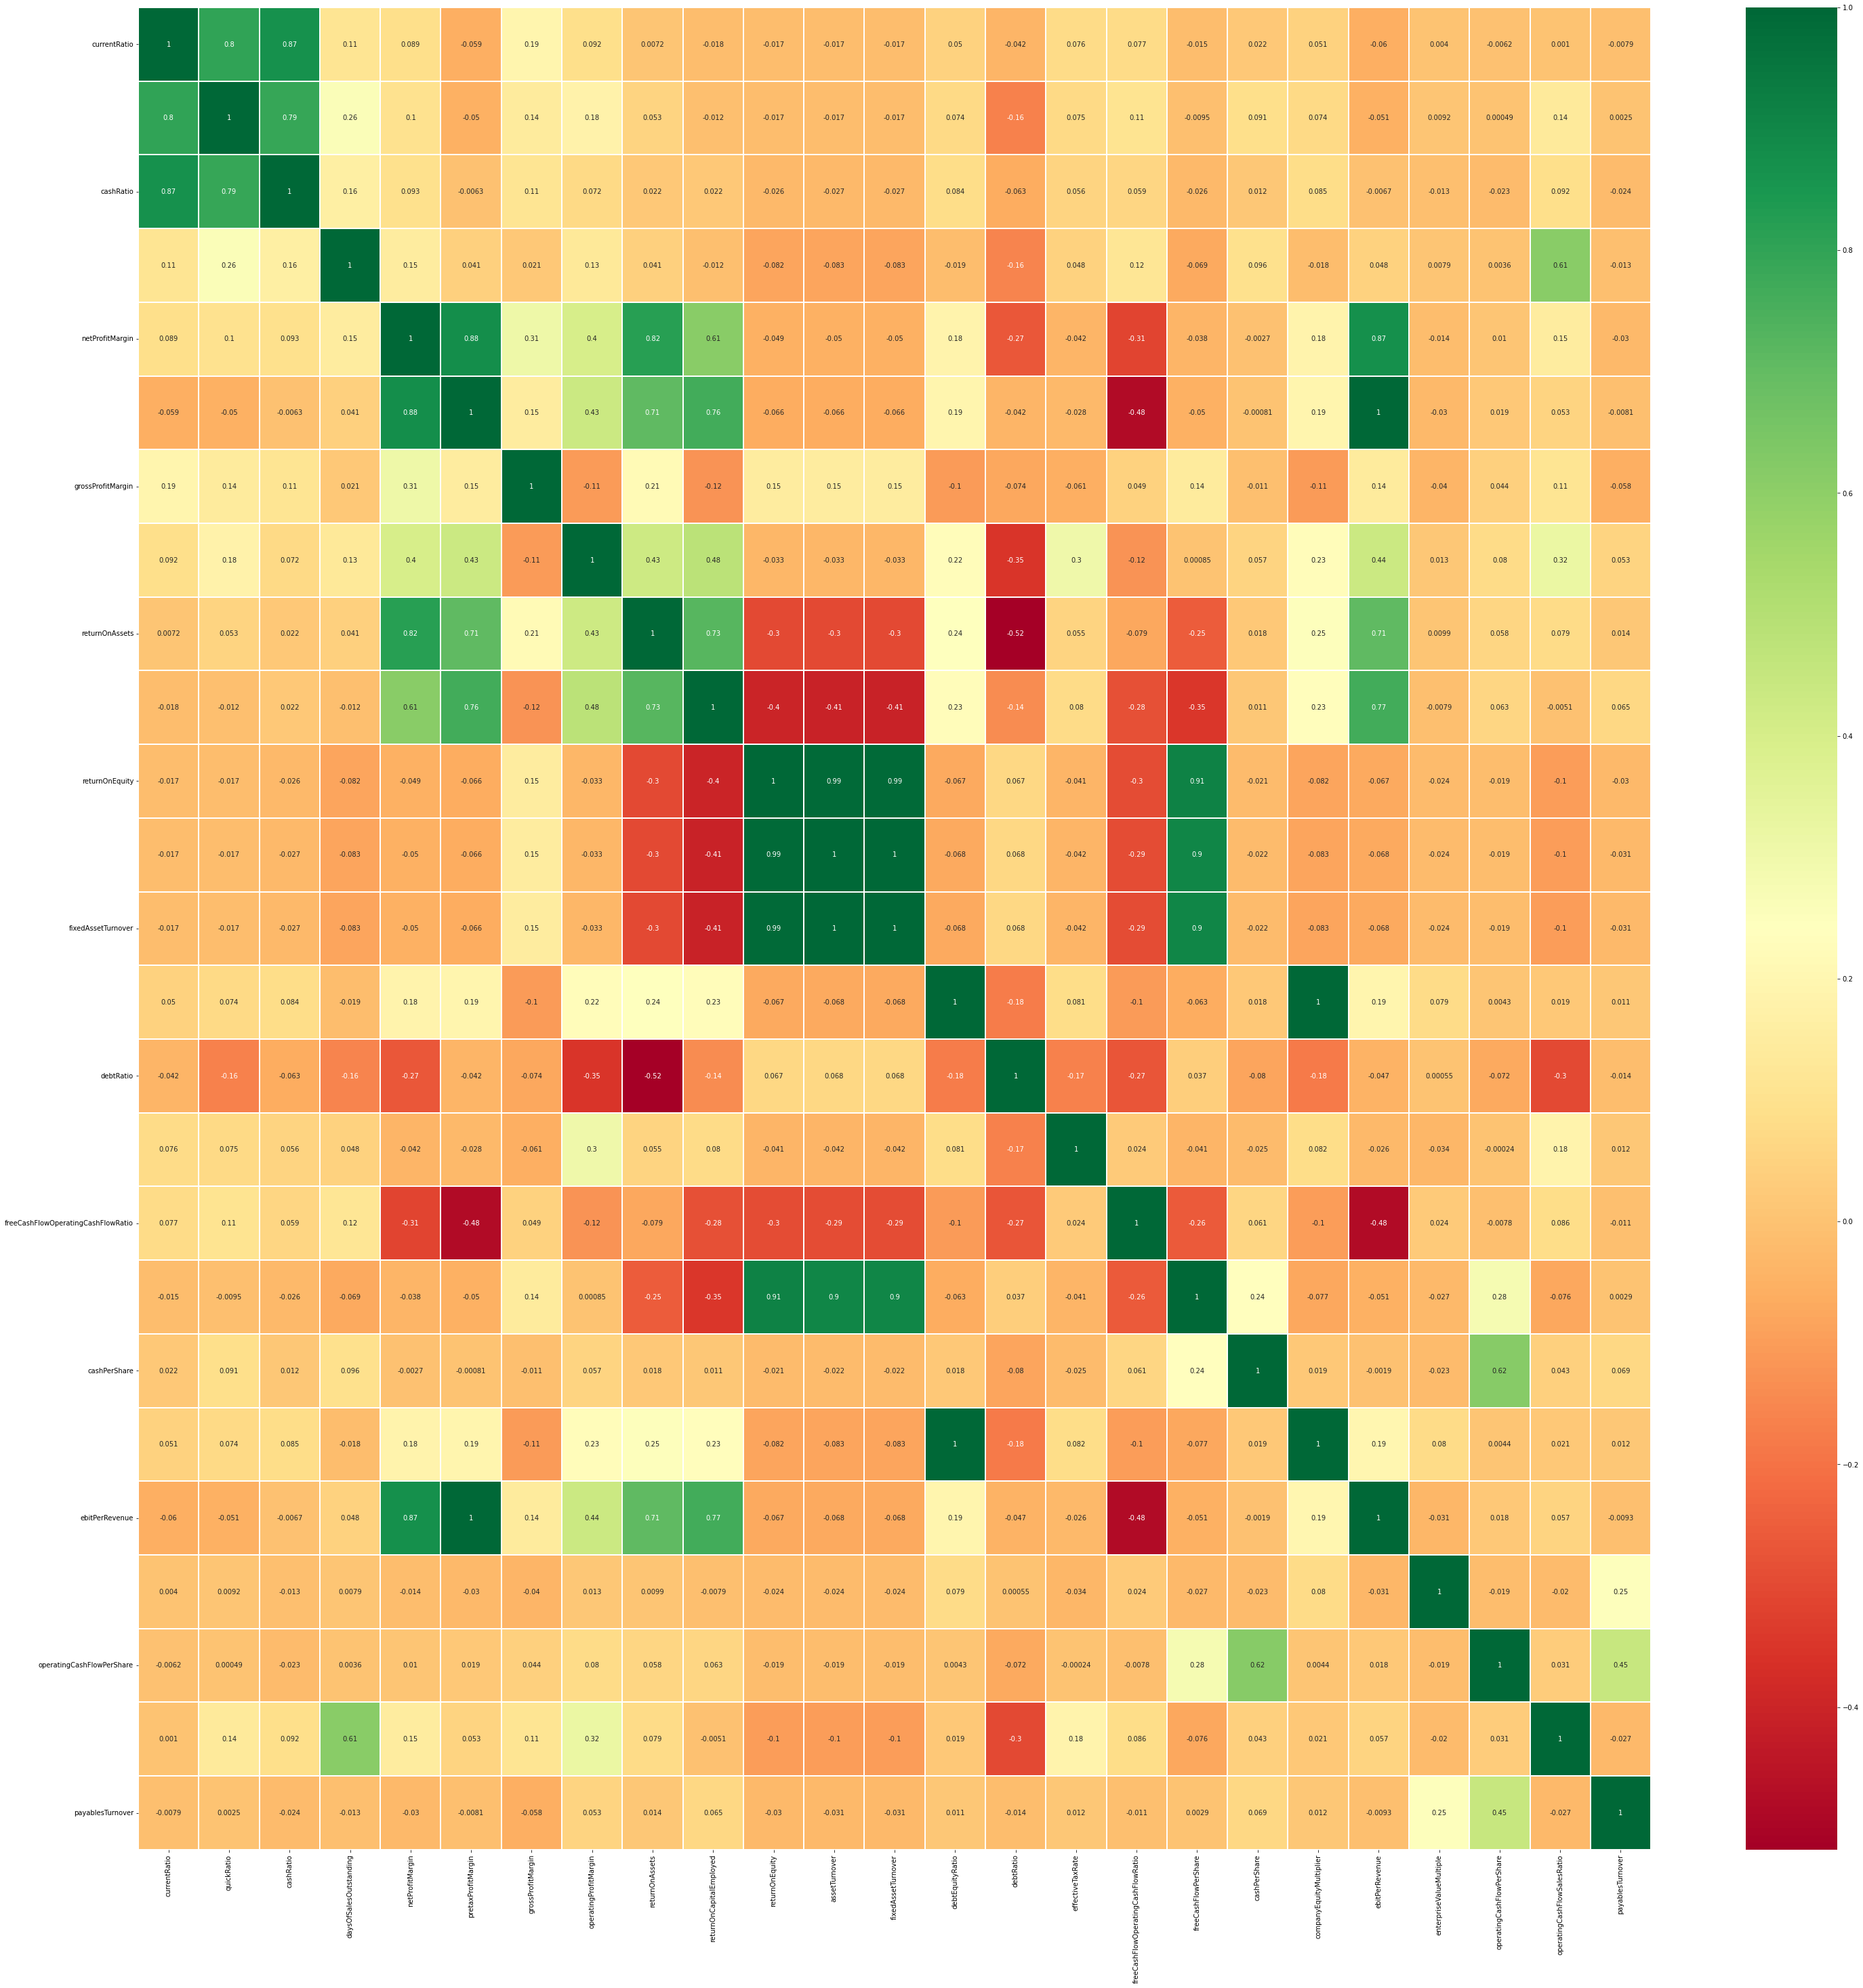

In [487]:
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(50,50)
plt.show()

In [488]:
df.corr()

,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,netProfitMargin,pretaxProfitMargin,grossProfitMargin,operatingProfitMargin,returnOnAssets,returnOnCapitalEmployed,...,effectiveTaxRate,freeCashFlowOperatingCashFlowRatio,freeCashFlowPerShare,cashPerShare,companyEquityMultiplier,ebitPerRevenue,enterpriseValueMultiple,operatingCashFlowPerShare,operatingCashFlowSalesRatio,payablesTurnover
currentRatio,1.000000,0.799947,0.866600,0.113326,0.089306,-0.058675,0.191783,0.091793,0.007158,-0.018394,...,0.076351,0.076658,-0.014712,0.021741,0.051016,-0.059762,0.003955,-0.006232,0.001037,-0.007883
quickRatio,0.799947,1.000000,0.790926,0.262862,0.101416,-0.049796,0.142761,0.179267,0.053021,-0.012143,...,0.075328,0.105232,-0.009499,0.091136,0.074217,-0.050629,0.009246,0.000485,0.135394,0.002496
cashRatio,0.866600,0.790926,1.000000,0.164153,0.093320,-0.006331,0.112671,0.071578,0.021729,0.021731,...,0.055776,0.059412,-0.026026,0.011959,0.084847,-0.006673,-0.012521,-0.022967,0.091788,-0.023505
daysOfSalesOutstanding,0.113326,0.262862,0.164153,1.000000,0.151636,0.040948,0.020897,0.129626,0.040677,-0.011973,...,0.047749,0.116885,-0.069417,0.095715,-0.017966,0.047557,0.007926,0.003556,0.610982,-0.013261
netProfitMargin,0.089306,0.101416,0.093320,0.151636,1.000000,0.876661,0.310343,0.395982,0.820782,0.613209,...,-0.042077,-0.314427,-0.037957,-0.002727,0.183586,0.874066,-0.013858,0.010041,0.147122,-0.029781
pretaxProfitMargin,-0.058675,-0.049796,-0.006331,0.040948,0.876661,1.000000,0.147375,0.432891,0.707875,0.764457,...,-0.027960,-0.481063,-0.049691,-0.000808,0.192369,0.996210,-0.030350,0.018631,0.052605,-0.008127
grossProfitMargin,0.191783,0.142761,0.112671,0.020897,0.310343,0.147375,1.000000,-0.107815,0.213393,-0.122808,...,-0.060934,0.048711,0.141163,-0.011359,-0.106407,0.142214,-0.039885,0.043896,0.111255,-0.057841
operatingProfitMargin,0.091793,0.179267,0.071578,0.129626,0.395982,0.432891,-0.107815,1.000000,0.426898,0.479508,...,0.301437,-0.122718,0.000853,0.056647,0.225091,0.436580,0.012732,0.079597,0.320763,0.052569
returnOnAssets,0.007158,0.053021,0.021729,0.040677,0.820782,0.707875,0.213393,0.426898,1.000000,0.725595,...,0.055069,-0.078570,-0.254426,0.017907,0.248819,0.707422,0.009878,0.058488,0.079097,0.014212
returnOnCapitalEmployed,-0.018394,-0.012143,0.021731,-0.011973,0.613209,0.764457,-0.122808,0.479508,0.725595,1.000000,...,0.080445,-0.283798,-0.348862,0.011368,0.230957,0.766363,-0.007891,0.063222,-0.005130,0.064541


In [489]:
df.drop(columns=['pretaxProfitMargin','freeCashFlowPerShare','companyEquityMultiplier','returnOnEquity'], inplace=True, axis=1)

In [490]:
df.corr()

,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,netProfitMargin,grossProfitMargin,operatingProfitMargin,returnOnAssets,returnOnCapitalEmployed,assetTurnover,...,debtEquityRatio,debtRatio,effectiveTaxRate,freeCashFlowOperatingCashFlowRatio,cashPerShare,ebitPerRevenue,enterpriseValueMultiple,operatingCashFlowPerShare,operatingCashFlowSalesRatio,payablesTurnover
currentRatio,1.000000,0.799947,0.866600,0.113326,0.089306,0.191783,0.091793,0.007158,-0.018394,-0.016881,...,0.050133,-0.042358,0.076351,0.076658,0.021741,-0.059762,0.003955,-0.006232,0.001037,-0.007883
quickRatio,0.799947,1.000000,0.790926,0.262862,0.101416,0.142761,0.179267,0.053021,-0.012143,-0.016854,...,0.073795,-0.163428,0.075328,0.105232,0.091136,-0.050629,0.009246,0.000485,0.135394,0.002496
cashRatio,0.866600,0.790926,1.000000,0.164153,0.093320,0.112671,0.071578,0.021729,0.021731,-0.026693,...,0.084130,-0.063431,0.055776,0.059412,0.011959,-0.006673,-0.012521,-0.022967,0.091788,-0.023505
daysOfSalesOutstanding,0.113326,0.262862,0.164153,1.000000,0.151636,0.020897,0.129626,0.040677,-0.011973,-0.082779,...,-0.019423,-0.159659,0.047749,0.116885,0.095715,0.047557,0.007926,0.003556,0.610982,-0.013261
netProfitMargin,0.089306,0.101416,0.093320,0.151636,1.000000,0.310343,0.395982,0.820782,0.613209,-0.049769,...,0.183363,-0.266420,-0.042077,-0.314427,-0.002727,0.874066,-0.013858,0.010041,0.147122,-0.029781
grossProfitMargin,0.191783,0.142761,0.112671,0.020897,0.310343,1.000000,-0.107815,0.213393,-0.122808,0.151142,...,-0.103854,-0.073537,-0.060934,0.048711,-0.011359,0.142214,-0.039885,0.043896,0.111255,-0.057841
operatingProfitMargin,0.091793,0.179267,0.071578,0.129626,0.395982,-0.107815,1.000000,0.426898,0.479508,-0.033039,...,0.224826,-0.354908,0.301437,-0.122718,0.056647,0.436580,0.012732,0.079597,0.320763,0.052569
returnOnAssets,0.007158,0.053021,0.021729,0.040677,0.820782,0.213393,0.426898,1.000000,0.725595,-0.303066,...,0.244909,-0.517388,0.055069,-0.078570,0.017907,0.707422,0.009878,0.058488,0.079097,0.014212
returnOnCapitalEmployed,-0.018394,-0.012143,0.021731,-0.011973,0.613209,-0.122808,0.479508,0.725595,1.000000,-0.406558,...,0.226037,-0.139239,0.080445,-0.283798,0.011368,0.766363,-0.007891,0.063222,-0.005130,0.064541
assetTurnover,-0.016881,-0.016854,-0.026693,-0.082779,-0.049769,0.151142,-0.033039,-0.303066,-0.406558,1.000000,...,-0.068408,0.067912,-0.041679,-0.293130,-0.021599,-0.067895,-0.024028,-0.018938,-0.102048,-0.030771


In [491]:
df

,Name,Symbol,Rating Agency Name,Date,Sector,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,netProfitMargin,...,debtRatio,effectiveTaxRate,freeCashFlowOperatingCashFlowRatio,cashPerShare,ebitPerRevenue,enterpriseValueMultiple,operatingCashFlowPerShare,operatingCashFlowSalesRatio,payablesTurnover,Rating
0,Whirlpool Corporation,WHR,Egan-Jones Ratings Company,11/27/2015,Consumer Durables,0.945894,0.426395,0.099690,44.203245,0.037480,...,0.750500,0.202716,0.437551,9.809403,0.049351,7.057088,15.565438,0.058638,3.906655,Low Risk
1,Whirlpool Corporation,WHR,Egan-Jones Ratings Company,2/13/2014,Consumer Durables,1.033559,0.498234,0.203120,38.991156,0.044062,...,0.683222,0.074155,0.541997,17.402270,0.048857,6.460618,15.914250,0.067239,4.002846,Medium Risk
2,Whirlpool Corporation,WHR,Fitch Ratings,3/6/2015,Consumer Durables,0.963703,0.451505,0.122099,50.841385,0.032709,...,0.755774,0.214529,0.513185,13.103448,0.044334,10.491970,18.888889,0.074426,3.483510,Medium Risk
3,Whirlpool Corporation,WHR,Fitch Ratings,6/15/2012,Consumer Durables,1.019851,0.510402,0.176116,41.161738,0.020894,...,0.724590,1.816667,-0.147170,14.440104,-0.012858,4.080741,6.901042,0.028394,4.581150,Medium Risk
4,Whirlpool Corporation,WHR,Standard & Poor's Ratings Services,10/24/2016,Consumer Durables,0.957844,0.495432,0.141608,47.761126,0.042861,...,0.750796,0.166966,0.451372,14.257556,0.053770,8.293505,15.808147,0.058065,3.857790,Medium Risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6705,California Resources Corporation,CRC,Standard & Poor's Ratings Services,8/24/2016,Energy,0.585399,0.389807,0.016529,54.738203,0.180349,...,1.087661,-0.388060,0.423077,1.262376,0.129929,20.818231,3.217822,0.084034,3.652968,In Default
6706,California Resources Corporation,CRC,Standard & Poor's Ratings Services,8/24/2016,Energy,0.585399,0.389807,0.016529,54.738203,0.180349,...,1.087661,-0.388060,0.423077,1.262376,0.129929,20.818231,3.217822,0.084034,3.652968,In Default
6707,California Resources Corporation,CRC,Standard & Poor's Ratings Services,8/24/2016,Energy,0.585399,0.389807,0.016529,54.738203,0.180349,...,1.087661,-0.388060,0.423077,1.262376,0.129929,20.818231,3.217822,0.084034,3.652968,In Default
6708,California Resources Corporation,CRC,Standard & Poor's Ratings Services,8/24/2016,Energy,0.585399,0.389807,0.016529,54.738203,0.180349,...,1.087661,-0.388060,0.423077,1.262376,0.129929,20.818231,3.217822,0.084034,3.652968,In Default


In [492]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df.Sector)
df.Sector = le.transform(df.Sector) # encode sector
le.fit(df.Rating)
df.Rating = le.transform(df.Rating)
le.fit(df.Name)
df.Name = le.transform(df.Name) # encode sector
le.fit(df['Rating Agency Name'])
df['Rating Agency Name'] = le.transform(df['Rating Agency Name'])

In [493]:
df.drop(columns=['Symbol','Date'], inplace=True)

In [494]:
df

,Name,Rating Agency Name,Sector,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,netProfitMargin,grossProfitMargin,operatingProfitMargin,...,debtRatio,effectiveTaxRate,freeCashFlowOperatingCashFlowRatio,cashPerShare,ebitPerRevenue,enterpriseValueMultiple,operatingCashFlowPerShare,operatingCashFlowSalesRatio,payablesTurnover,Rating
0,578,1,2,0.945894,0.426395,0.099690,44.203245,0.037480,0.176631,0.061510,...,0.750500,0.202716,0.437551,9.809403,0.049351,7.057088,15.565438,0.058638,3.906655,3
1,578,1,2,1.033559,0.498234,0.203120,38.991156,0.044062,0.175715,0.066546,...,0.683222,0.074155,0.541997,17.402270,0.048857,6.460618,15.914250,0.067239,4.002846,5
2,578,2,2,0.963703,0.451505,0.122099,50.841385,0.032709,0.170843,0.059783,...,0.755774,0.214529,0.513185,13.103448,0.044334,10.491970,18.888889,0.074426,3.483510,5
3,578,2,2,1.019851,0.510402,0.176116,41.161738,0.020894,0.138059,0.042430,...,0.724590,1.816667,-0.147170,14.440104,-0.012858,4.080741,6.901042,0.028394,4.581150,5
4,578,4,2,0.957844,0.495432,0.141608,47.761126,0.042861,0.177720,0.065354,...,0.750796,0.166966,0.451372,14.257556,0.053770,8.293505,15.808147,0.058065,3.857790,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6705,104,4,5,0.585399,0.389807,0.016529,54.738203,0.180349,1.000000,-0.197802,...,1.087661,-0.388060,0.423077,1.262376,0.129929,20.818231,3.217822,0.084034,3.652968,2
6706,104,4,5,0.585399,0.389807,0.016529,54.738203,0.180349,1.000000,-0.197802,...,1.087661,-0.388060,0.423077,1.262376,0.129929,20.818231,3.217822,0.084034,3.652968,2
6707,104,4,5,0.585399,0.389807,0.016529,54.738203,0.180349,1.000000,-0.197802,...,1.087661,-0.388060,0.423077,1.262376,0.129929,20.818231,3.217822,0.084034,3.652968,2
6708,104,4,5,0.585399,0.389807,0.016529,54.738203,0.180349,1.000000,-0.197802,...,1.087661,-0.388060,0.423077,1.262376,0.129929,20.818231,3.217822,0.084034,3.652968,2


### Dividing the Dataset intro Training, Testing and Validation

In [495]:
X= df.iloc[:,:-1].values
Y= df.iloc[:,-1].values

In [496]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y, test_size=0.25, random_state=0)
X_train

array([[1.35000000e+02, 3.00000000e+00, 0.00000000e+00, ...,
        2.47340599e-01, 1.88248150e-02, 1.67149577e+01],
       [1.04000000e+02, 4.00000000e+00, 5.00000000e+00, ...,
        3.21782178e+00, 8.40336130e-02, 3.65296804e+00],
       [9.80000000e+01, 3.00000000e+00, 5.00000000e+00, ...,
        3.07189639e+00, 2.22648320e-01, 2.24119053e+01],
       ...,
       [4.65000000e+02, 3.00000000e+00, 1.10000000e+01, ...,
        9.81059589e+00, 1.62274730e-01, 1.04042278e+01],
       [2.37000000e+02, 1.00000000e+00, 1.00000000e+00, ...,
        1.11219838e+01, 1.20834954e-01, 7.45503160e+00],
       [1.26000000e+02, 1.00000000e+00, 5.00000000e+00, ...,
        1.82587376e+01, 1.52948682e-01, 1.07942143e+00]])

### Feature Scling (It is done to bring values of all the colums to same scale)

In [497]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_train)
print(X_test)

[[-0.83178908  0.21585081 -1.57083746 ... -0.12631124 -0.62872309
   0.14055221]
 [-1.01641464  1.00178515 -0.09546526 ... -0.12176775 -0.34822736
  -0.13094863]
 [-1.05214862  0.21585081 -0.09546526 ... -0.12199095  0.24802399
   0.2589665 ]
 ...
 [ 1.13357977  0.21585081  1.67498138 ... -0.11168378 -0.01167309
   0.00938012]
 [-0.22431144 -1.35601788 -1.27576302 ... -0.10967795 -0.18992634
  -0.05192059]
 [-0.88539005 -1.35601788 -0.09546526 ... -0.09876193 -0.05178909
  -0.18444125]]
[[-0.39702567 -1.35601788  1.0848325  ... -0.12324591 -0.33632453
   0.88005596]
 [-0.80201077 -1.35601788 -0.68561414 ... -0.12142455  0.08146212
  -0.09514942]
 [ 1.62789982  0.21585081 -0.09546526 ... -0.11571919 -0.57183096
   0.04705869]
 ...
 [ 0.5141908   0.21585081  1.37990694 ... -0.12092807  1.13557793
  -0.11960316]
 [-1.02237031 -1.35601788 -0.3905397  ... -0.13466274 -1.03057317
  -0.16554474]
 [ 0.15685101  0.21585081  0.49468362 ... -0.11720802  0.34070502
  -0.13276479]]


### FITTING THE MODELS

### LOGISTIC REGRESSION 

In [498]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

LR_model = LogisticRegression(random_state=124 , multi_class='multinomial', solver='newton-cg')
LR_model = LR_model.fit(X_train, Y_train)
y_pred_LR = LR_model.predict(X_test)
Accuracy_LR = metrics.accuracy_score(Y_test, y_pred_LR)
print("LR Accuracy:",Accuracy_LR)

LR Accuracy: 0.7300357568533969


### K NEAREST NEIGHBOUR ALGORITHM

In [499]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

KNN_model = KNeighborsClassifier(n_neighbors = 81)
KNN_model.fit(X_train,Y_train)
y_pred_KNN = KNN_model.predict(X_test)
Accuracy_KNN = metrics.accuracy_score(Y_test, y_pred_KNN)
print("KNN Accuracy:",Accuracy_KNN)
print(metrics.classification_report(Y_test,y_pred_KNN))

KNN Accuracy: 0.732419547079857
              precision    recall  f1-score   support

           0       0.57      0.56      0.57       346
           1       0.86      0.84      0.85       494
           2       0.99      1.00      0.99       177
           3       0.67      0.75      0.71       355
           4       0.69      1.00      0.82       160
           5       0.36      0.12      0.18       146

    accuracy                           0.73      1678
   macro avg       0.69      0.71      0.69      1678
weighted avg       0.71      0.73      0.72      1678



### RANDOM FOREST CLASSIFIER

In [500]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

RF_model = RandomForestClassifier(random_state=1234,n_estimators=100)
RF_model.fit(X_train,Y_train)
y_pred_RF = RF_model.predict(X_test)
Accuracy_RF = metrics.accuracy_score(Y_test, y_pred_RF)
print("RF Accuracy:",Accuracy_RF)
print(metrics.classification_report(Y_test,y_pred_RF))

RF Accuracy: 0.930870083432658
              precision    recall  f1-score   support

           0       0.86      0.91      0.88       346
           1       0.99      1.00      1.00       494
           2       1.00      1.00      1.00       177
           3       0.92      0.94      0.93       355
           4       1.00      1.00      1.00       160
           5       0.72      0.57      0.64       146

    accuracy                           0.93      1678
   macro avg       0.92      0.90      0.91      1678
weighted avg       0.93      0.93      0.93      1678



In [501]:
RF_model.feature_importances_

array([0.02656096, 0.03944306, 0.02427978, 0.04772161, 0.03764485,
       0.04059866, 0.02982003, 0.06922599, 0.0234764 , 0.04845393,
       0.06013038, 0.04698124, 0.0156653 , 0.02345078, 0.05789495,
       0.05356203, 0.04758011, 0.02719864, 0.02579238, 0.04137687,
       0.03152997, 0.08110101, 0.07265259, 0.02785847])

### SUPPORT VECTOR MACHINE

In [502]:
from sklearn import svm
from sklearn import metrics

SVC_model = svm.SVC(kernel='rbf', gamma= 2, C = 5, random_state=1234)
SVC_model.fit(X_train, Y_train)
y_pred_SVM = SVC_model.predict(X_test)
Accuracy_SVM = metrics.accuracy_score(Y_test, y_pred_SVM)
print("SVM Accuracy:",Accuracy_SVM)

SVM Accuracy: 0.9249106078665077


### COMPARING THE RESULTS

In [503]:
accuracy_list = [ Accuracy_RF, Accuracy_SVM, Accuracy_KNN, Accuracy_LR]

model_list = ['Random Forest', 'Support Vector Machine',  'KNN', 'Logistic Regression']

df_accuracy = pd.DataFrame({'Model': model_list, 'Accuracy': accuracy_list})

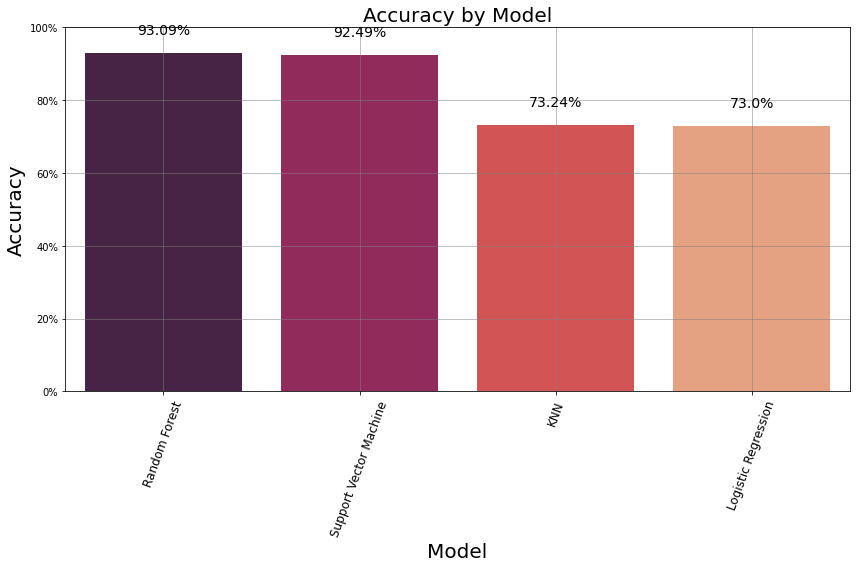

In [504]:
import matplotlib.ticker as mtick

order = list(df_accuracy.sort_values('Accuracy', ascending=False).Model)
df_accuracy = df_accuracy.sort_values('Accuracy', ascending=False).reset_index().drop(['index'], axis=1)

plt.figure(figsize=(12,8))
# make barplot and sort bars
x = sns.barplot(x='Model', y="Accuracy", data=df_accuracy, order = order, palette="rocket")
plt.xlabel("Model", fontsize=20)
plt.ylabel("Accuracy", fontsize=20)
plt.title("Accuracy by Model", fontsize=20)
plt.grid(linestyle='-', linewidth='0.5', color='grey')
plt.xticks(rotation=70, fontsize=12)
plt.ylim(0,1)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))

for i in range(len(model_list)):
    plt.text(x = i, y = df_accuracy.loc[i, 'Accuracy'] + 0.05, s = str(round((df_accuracy.loc[i, 'Accuracy'])*100, 2))+'%', 
             fontsize = 14, color='black',horizontalalignment='center')


plt.tight_layout()